In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [3]:
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,ID,Potability
0,NaN,202.569467,22256.950365,6.913501,304.951498,434.198436,13.696893,64.205667,4.478070,2500,0
1,5.319769,204.202072,22390.795566,8.053559,315.027505,399.119025,13.974085,83.157997,2.925732,1044,0
2,7.350379,193.633367,26736.085567,10.416589,309.416883,557.495685,16.519722,61.077383,3.663922,415,0
3,7.612517,225.492793,14812.970645,7.982595,356.690174,341.074925,14.994662,55.893916,2.939593,2841,1
4,7.122637,183.402648,31295.902410,4.425026,NaN,411.616070,14.066057,77.185792,3.750447,2567,0


**Data Information,description and handling missing values:**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2085 non-null   float64
 1   Hardness         2457 non-null   float64
 2   Solids           2457 non-null   float64
 3   Chloramines      2457 non-null   float64
 4   Sulfate          1856 non-null   float64
 5   Conductivity     2457 non-null   float64
 6   Organic_carbon   2457 non-null   float64
 7   Trihalomethanes  2339 non-null   float64
 8   Turbidity        2457 non-null   float64
 9   ID               2457 non-null   int64  
 10  Potability       2457 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 211.3 KB


In [5]:
train_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,ID,Potability
count,2085.000000,2457.000000,2457.000000,2457.000000,1856.000000,2457.000000,2457.000000,2339.000000,2457.000000,2457.000000,2457.000000
mean,7.091132,196.574669,22067.550859,7.115832,333.900498,426.557199,14.257422,66.462192,3.954781,1657.868132,0.394383
std,1.585194,32.837192,8857.439364,1.572847,41.415814,81.572020,3.285923,16.291432,0.775821,935.004181,0.488817
min,0.000000,73.492234,728.750830,0.352000,129.000000,181.483754,4.371899,8.175876,1.492207,1.000000,0.000000
25%,6.102533,176.772186,15736.580986,6.112819,307.738158,365.720292,12.031863,55.724326,3.434799,866.000000,0.000000
50%,7.025457,197.215210,20933.512750,7.130161,332.861559,422.039495,14.171164,66.746781,3.937334,1660.000000,0.000000
75%,8.065339,217.324800,27198.432591,8.105803,360.295455,481.853415,16.563167,77.579755,4.489545,2465.000000,1.000000
max,14.000000,323.124000,61227.196008,13.043806,481.030642,753.342620,28.300000,124.000000,6.739000,3275.000000,1.000000


In [6]:
train_df.skew()

ph                 0.027661
Hardness          -0.029208
Solids             0.663432
Chloramines       -0.039178
Sulfate           -0.035844
Conductivity       0.281756
Organic_carbon     0.018261
Trihalomethanes   -0.103737
Turbidity         -0.010875
ID                -0.021907
Potability         0.432483
dtype: float64

In [7]:
train_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2452    False
2453    False
2454    False
2455    False
2456    False
Length: 2457, dtype: bool

In [8]:
train_df.isna().sum()

ph                 372
Hardness             0
Solids               0
Chloramines          0
Sulfate            601
Conductivity         0
Organic_carbon       0
Trihalomethanes    118
Turbidity            0
ID                   0
Potability           0
dtype: int64

In [9]:
train_df.fillna(train_df.mean(), inplace = True)

In [10]:
train_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
ID                 0
Potability         0
dtype: int64

In [11]:
train_df['Potability'].value_counts()

0    1488
1     969
Name: Potability, dtype: int64

# EDA:

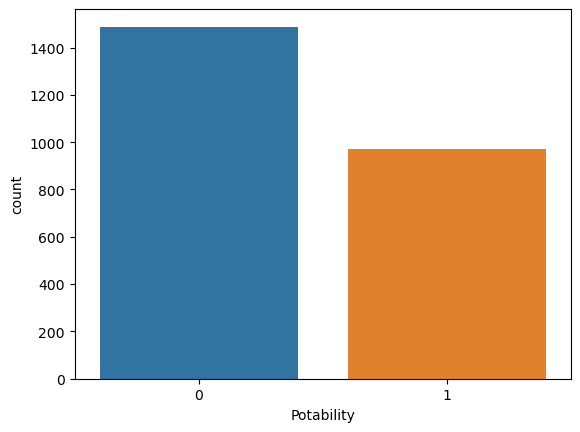

In [12]:
sns.countplot(data = train_df, x = 'Potability')
plt.show()

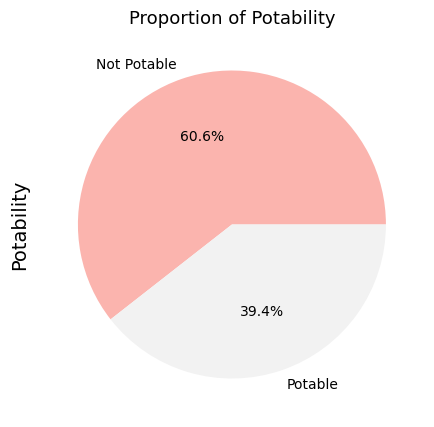

In [13]:
figure = plt.figure(figsize=[10, 5])

train_df['Potability'].value_counts().plot.pie(autopct='%3.1f%%',labels = ['Not Potable', 'Potable'] ,cmap = 'Pastel1')

plt.ylabel(ylabel='Potability', size=14)
plt.title(label='Proportion of Potability', size=13)
plt.show()

In [14]:
print('Minimum value in Hardness column is :', train_df['Hardness'].min())
print('Maximum value in Hardness column is :', train_df['Hardness'].max())

Minimum value in Hardness column is : 73.4922336890611
Maximum value in Hardness column is : 323.124


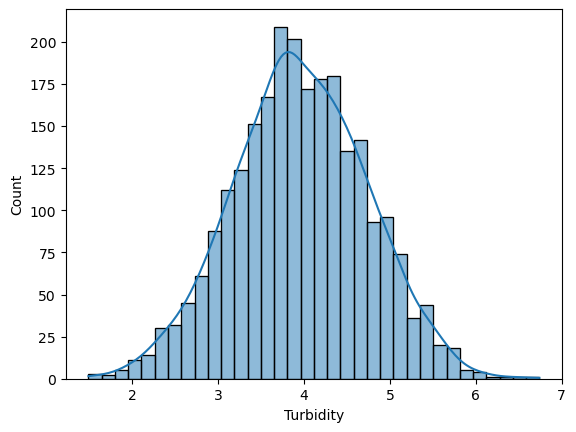

In [15]:
sns.histplot(train_df['Turbidity'], kde = True)
plt.show()

In [16]:
print('Minimum value in Turbidity column is :', train_df['Turbidity'].min())
print('Maximum value in Turbidity column is :', train_df['Turbidity'].max())

Minimum value in Turbidity column is : 1.4922066153042484
Maximum value in Turbidity column is : 6.739


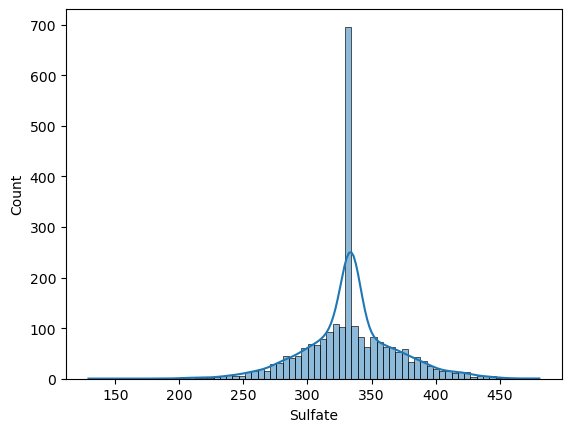

In [17]:
sns.histplot(train_df['Sulfate'], kde = True)
plt.show()

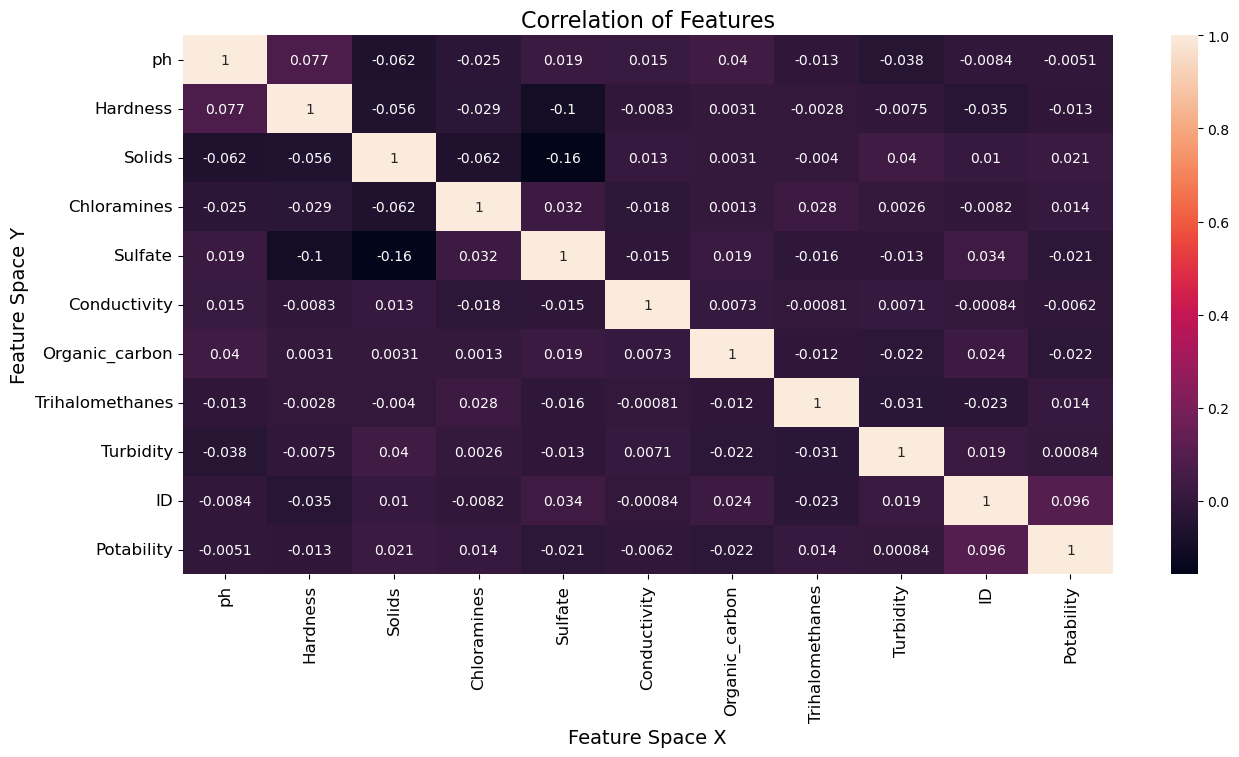

In [18]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

In [19]:
train_df.drop('ID', axis = 1, inplace = True)   #dropping ID column

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2457 non-null   float64
 1   Hardness         2457 non-null   float64
 2   Solids           2457 non-null   float64
 3   Chloramines      2457 non-null   float64
 4   Sulfate          2457 non-null   float64
 5   Conductivity     2457 non-null   float64
 6   Organic_carbon   2457 non-null   float64
 7   Trihalomethanes  2457 non-null   float64
 8   Turbidity        2457 non-null   float64
 9   Potability       2457 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 192.1 KB


**Treating Outliers:**

ph


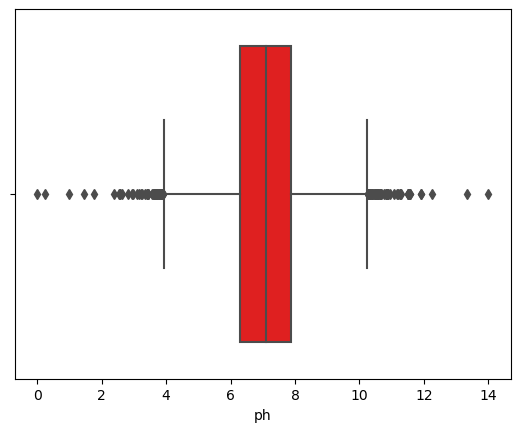

Hardness


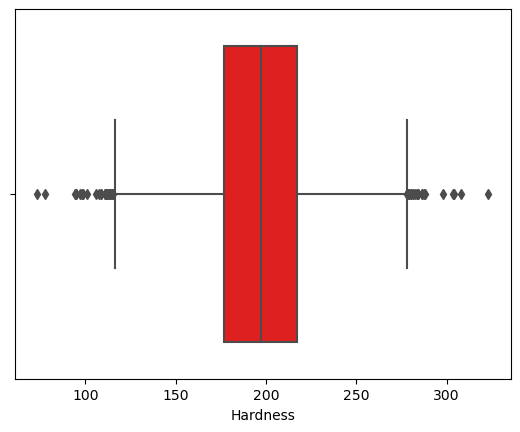

Solids


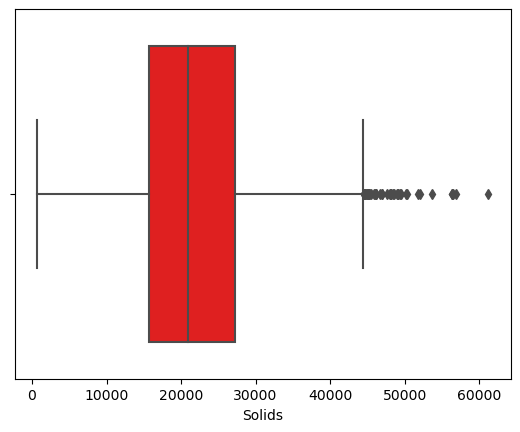

Chloramines


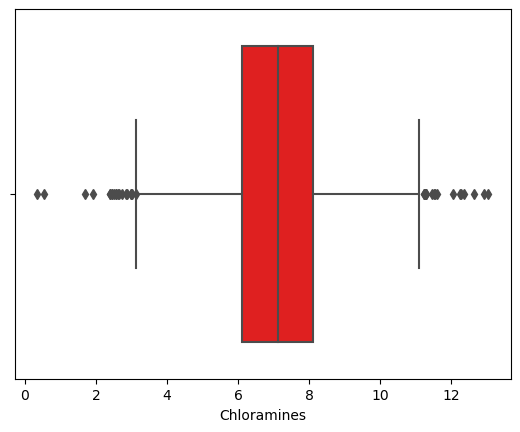

Sulfate


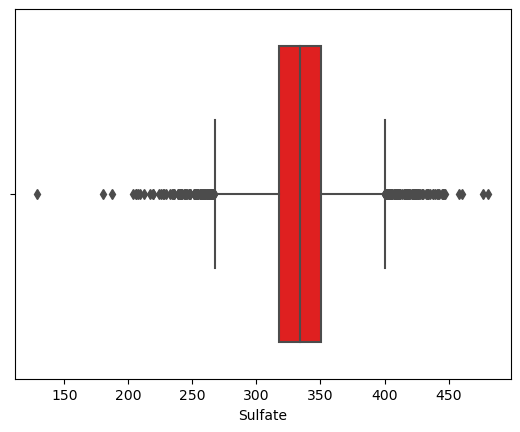

Conductivity


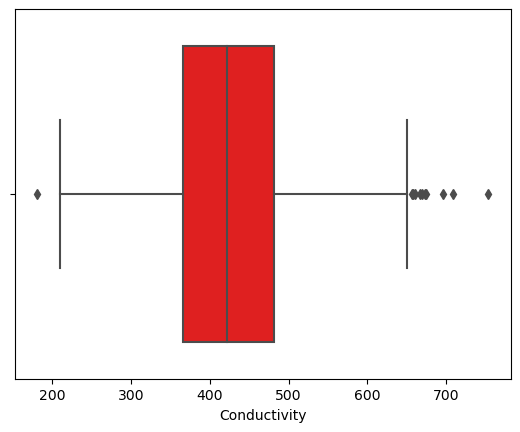

Organic_carbon


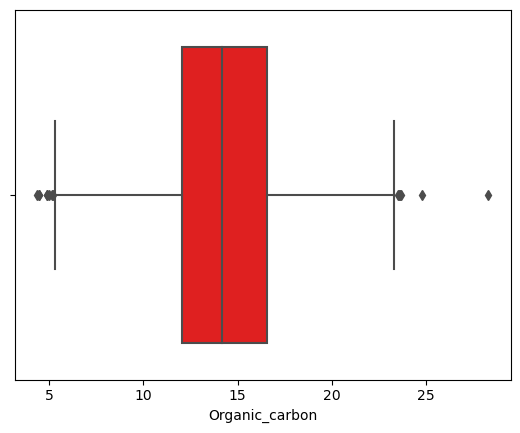

Trihalomethanes


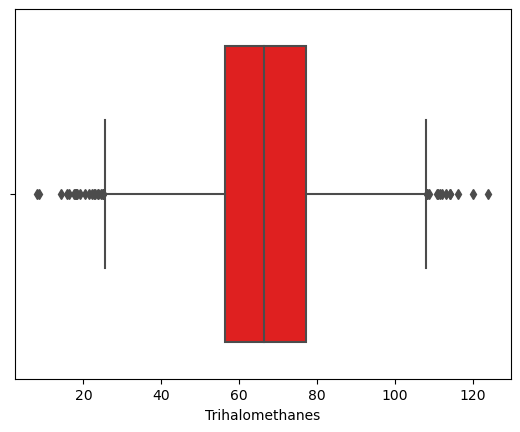

Turbidity


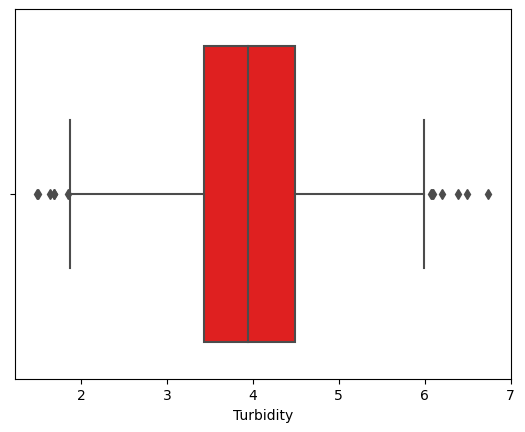

In [21]:
for col in train_df.iloc[:,:9].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [22]:
def Outlier(var):
    for x in var.iloc[:, :9].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(train_df)

ph


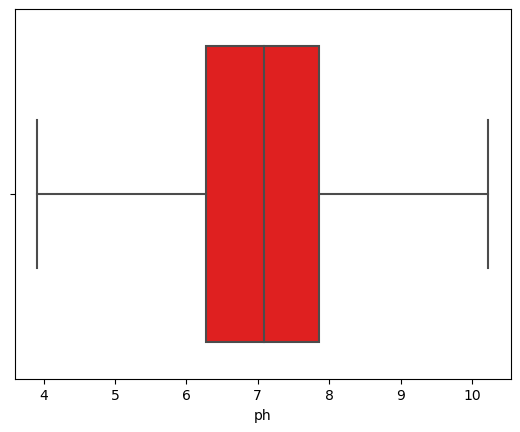

Hardness


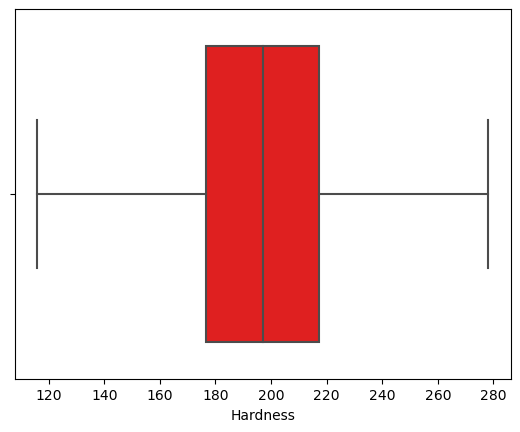

Solids


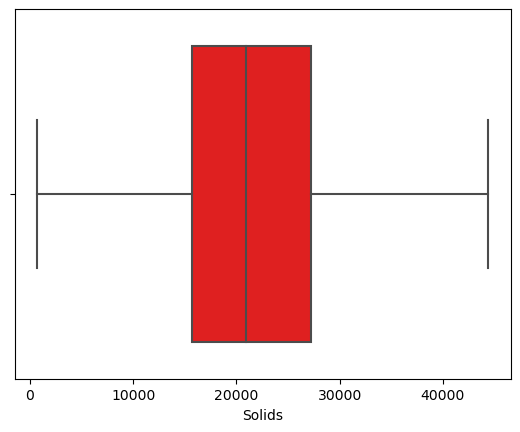

Chloramines


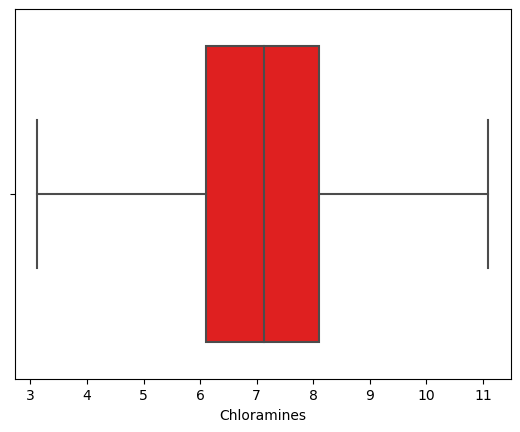

Sulfate


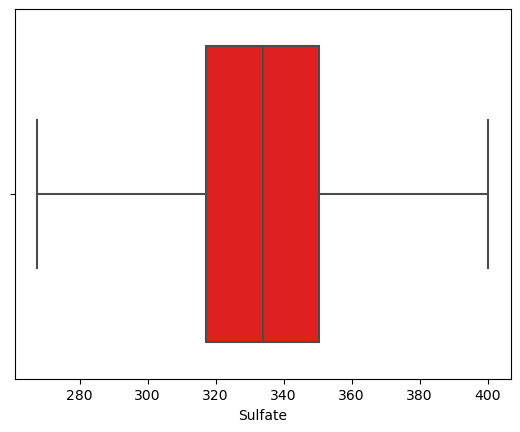

Conductivity


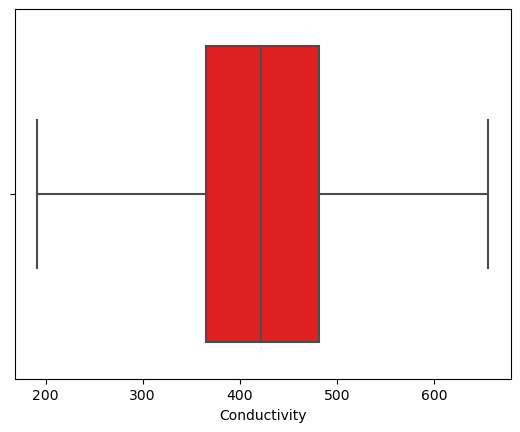

Organic_carbon


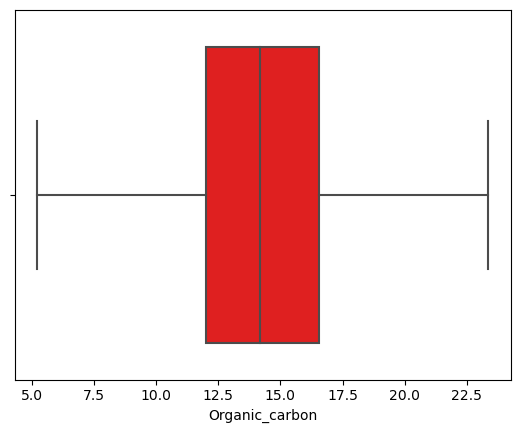

Trihalomethanes


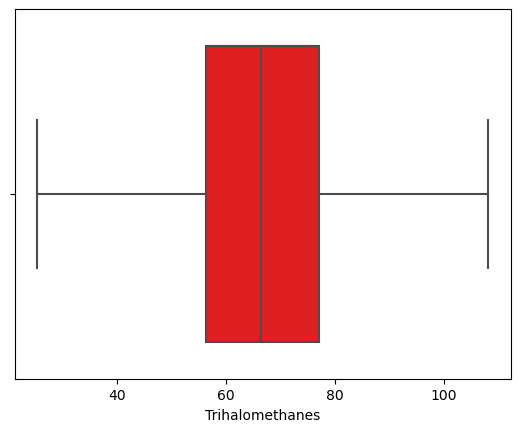

Turbidity


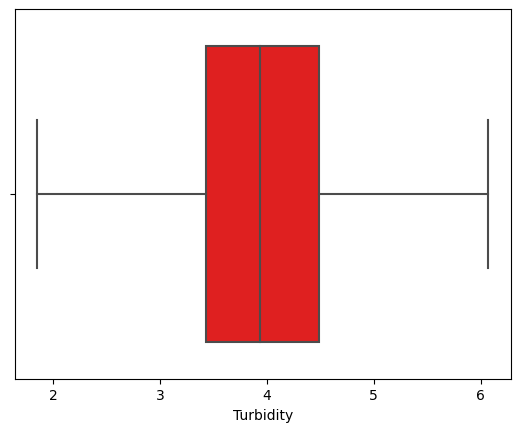

In [23]:
for col in train_df.iloc[:, :9].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2457 non-null   float64
 1   Hardness         2457 non-null   float64
 2   Solids           2457 non-null   float64
 3   Chloramines      2457 non-null   float64
 4   Sulfate          2457 non-null   float64
 5   Conductivity     2457 non-null   float64
 6   Organic_carbon   2457 non-null   float64
 7   Trihalomethanes  2457 non-null   float64
 8   Turbidity        2457 non-null   float64
 9   Potability       2457 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 192.1 KB


# Train-Test Split:

In [25]:
X = df_train.iloc[:, 0:9]
Y = df_train['Potability']

In [26]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.091132,202.569467,22256.950365,6.913501,304.951498,434.198436,13.696893,64.205667,4.478070
1,5.319769,204.202072,22390.795566,8.053559,315.027505,399.119025,13.974085,83.157997,2.925732
2,7.350379,193.633367,26736.085567,10.416589,309.416883,557.495685,16.519722,61.077383,3.663922
3,7.612517,225.492793,14812.970645,7.982595,356.690174,341.074925,14.994662,55.893916,2.939593
4,7.122637,183.402648,31295.902410,4.425026,333.900498,411.616070,14.066057,77.185792,3.750447
...,...,...,...,...,...,...,...,...,...
2452,4.187491,208.374188,21809.709834,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959
2453,7.793915,164.958947,25506.912237,7.868036,358.259200,398.460312,15.297496,66.462192,4.220028
2454,6.630364,186.761088,30939.023214,7.703481,333.900498,330.876083,13.815757,86.753117,3.490588
2455,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137


In [27]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
2452    1
2453    1
2454    0
2455    0
2456    1
Name: Potability, Length: 2457, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 123, shuffle = True)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1965, 9)
(492, 9)
(1965,)
(492,)


# Standard Scaler:

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. LogisticRegression :

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, Y_train)

LogisticRegression()

In [37]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Model Evaluation:

In [38]:
def model_eval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [39]:
model_eval(Y_train, Y_pred_train)

[[1181    0]
 [ 783    1]]
The accuracy of the Model is : 0.601526717557252
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      1181
           1       1.00      0.00      0.00       784

    accuracy                           0.60      1965
   macro avg       0.80      0.50      0.38      1965
weighted avg       0.76      0.60      0.45      1965



In [40]:
model_eval(Y_test, Y_pred_test)

[[307   0]
 [185   0]]
The accuracy of the Model is : 0.6239837398373984
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       307
           1       0.00      0.00      0.00       185

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492



# 2. DecisionTreeClassifier:

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

In [43]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
Y_pred_dt_train = dtree.predict(X_train)
Y_pred_dt_test = dtree.predict(X_test)

# Model Evaluation:

In [45]:
model_eval(Y_train, Y_pred_dt_train)

[[1181    0]
 [   0  784]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1965
   macro avg       1.00      1.00      1.00      1965
weighted avg       1.00      1.00      1.00      1965



In [46]:
model_eval(Y_test, Y_pred_dt_test)

[[207 100]
 [ 87  98]]
The accuracy of the Model is : 0.6199186991869918
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       307
           1       0.49      0.53      0.51       185

    accuracy                           0.62       492
   macro avg       0.60      0.60      0.60       492
weighted avg       0.63      0.62      0.62       492



# 3. RandomForestClassifier:

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()

In [49]:
rfc.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation:

In [50]:
Y_pred_rf_train = rfc.predict(X_train)
Y_pred_rf_test = rfc.predict(X_test)

In [51]:
model_eval(Y_train, Y_pred_rf_train)

[[1181    0]
 [   0  784]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1965
   macro avg       1.00      1.00      1.00      1965
weighted avg       1.00      1.00      1.00      1965



In [52]:
model_eval(Y_test, Y_pred_test)

[[307   0]
 [185   0]]
The accuracy of the Model is : 0.6239837398373984
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       307
           1       0.00      0.00      0.00       185

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492



# 4(a). KNeighborsClassifier:

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
neigh = KNeighborsClassifier(n_neighbors = 5)

In [55]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier()

In [56]:
Y_pred_Kn_train = neigh.predict(X_train)
Y_pred_Kn_test = neigh.predict(X_test)

# Model Evaluation on 4(a):

In [57]:
model_eval(Y_train, Y_pred_Kn_train)

[[1028  153]
 [ 338  446]]
The accuracy of the Model is : 0.7501272264631044
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1181
           1       0.74      0.57      0.64       784

    accuracy                           0.75      1965
   macro avg       0.75      0.72      0.73      1965
weighted avg       0.75      0.75      0.74      1965



In [58]:
model_eval(Y_test, Y_pred_Kn_test)

[[249  58]
 [106  79]]
The accuracy of the Model is : 0.6666666666666666
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       307
           1       0.58      0.43      0.49       185

    accuracy                           0.67       492
   macro avg       0.64      0.62      0.62       492
weighted avg       0.65      0.67      0.65       492



# Finding the best K neighbors :

In [59]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

In [60]:
error

[0.39634146341463417,
 0.3638211382113821,
 0.3800813008130081,
 0.34959349593495936,
 0.3333333333333333,
 0.34146341463414637,
 0.34552845528455284,
 0.3678861788617886,
 0.3617886178861789,
 0.3617886178861789,
 0.3719512195121951,
 0.37601626016260165,
 0.35772357723577236,
 0.3516260162601626,
 0.3638211382113821,
 0.3617886178861789,
 0.35772357723577236,
 0.3719512195121951,
 0.3861788617886179,
 0.35365853658536583,
 0.3699186991869919,
 0.3556910569105691,
 0.3638211382113821,
 0.3434959349593496,
 0.34146341463414637,
 0.34552845528455284,
 0.34959349593495936,
 0.3475609756097561,
 0.35365853658536583,
 0.3394308943089431,
 0.3333333333333333,
 0.32926829268292684,
 0.33739837398373984,
 0.3231707317073171,
 0.3313008130081301,
 0.32926829268292684,
 0.31910569105691056,
 0.32723577235772355,
 0.32723577235772355]

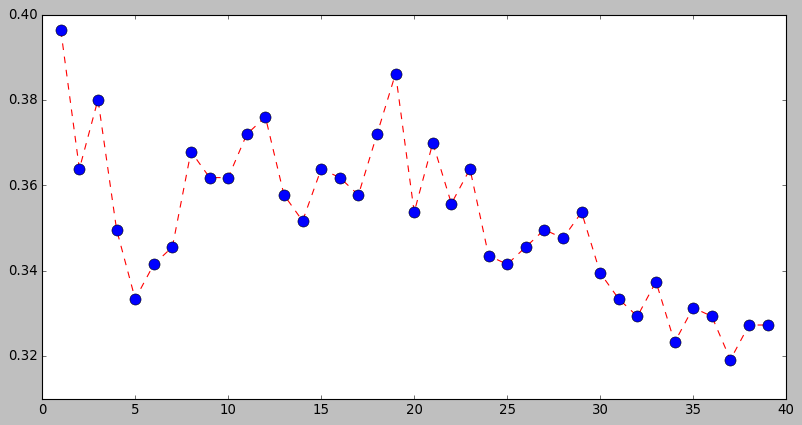

In [61]:
plt.style.use("classic")
plt.figure(figsize = (12,6))
plt.plot(range(1, 40), error, color = 'red', linestyle = "dashed", marker = "o", markerfacecolor = "blue", markersize = 10)
plt.show()

# 4(b). KNeighborsClassifier:

In [62]:
knn = KNeighborsClassifier(n_neighbors = 37)

In [63]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=37)

In [64]:
y_pred_kn2_train = knn.predict(X_train)
y_pred_kn2_test = knn.predict(X_test)

# Model Evaluation on 4(b):

In [65]:
model_eval(Y_train, y_pred_kn2_train)

[[1127   54]
 [ 603  181]]
The accuracy of the Model is : 0.665648854961832
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      1181
           1       0.77      0.23      0.36       784

    accuracy                           0.67      1965
   macro avg       0.71      0.59      0.56      1965
weighted avg       0.70      0.67      0.61      1965



In [66]:
model_eval(Y_test, y_pred_kn2_test)

[[296  11]
 [146  39]]
The accuracy of the Model is : 0.6808943089430894
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       307
           1       0.78      0.21      0.33       185

    accuracy                           0.68       492
   macro avg       0.72      0.59      0.56       492
weighted avg       0.71      0.68      0.62       492



# 5. XGBClassifier:

In [67]:
from xgboost import XGBClassifier

In [68]:
boost = XGBClassifier()

In [69]:
boost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [70]:
Y_model_pred_train = boost.predict(X_train)
Y_model_pred_test = boost.predict(X_test)

# Model Evaluation:

In [71]:
model_eval(Y_train, Y_model_pred_train)

[[1181    0]
 [   0  784]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1965
   macro avg       1.00      1.00      1.00      1965
weighted avg       1.00      1.00      1.00      1965



In [72]:
model_eval(Y_test, Y_model_pred_test)

[[241  66]
 [ 99  86]]
The accuracy of the Model is : 0.6646341463414634
              precision    recall  f1-score   support

           0       0.71      0.79      0.74       307
           1       0.57      0.46      0.51       185

    accuracy                           0.66       492
   macro avg       0.64      0.62      0.63       492
weighted avg       0.66      0.66      0.66       492



In [73]:
test_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,ID
0,NaN,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,2947
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,2782
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,1644
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,70
4,6.615350,179.240661,26392.863612,9.309160,NaN,496.363562,12.786595,78.262369,4.453443,2045


In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               700 non-null    float64
 1   Hardness         819 non-null    float64
 2   Solids           819 non-null    float64
 3   Chloramines      819 non-null    float64
 4   Sulfate          639 non-null    float64
 5   Conductivity     819 non-null    float64
 6   Organic_carbon   819 non-null    float64
 7   Trihalomethanes  775 non-null    float64
 8   Turbidity        819 non-null    float64
 9   ID               819 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 64.1 KB


In [75]:
test_df.isna().sum()

ph                 119
Hardness             0
Solids               0
Chloramines          0
Sulfate            180
Conductivity         0
Organic_carbon       0
Trihalomethanes     44
Turbidity            0
ID                   0
dtype: int64

In [76]:
test_df.fillna(test_df.mean(), inplace = True)

In [77]:
test_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
ID                 0
dtype: int64

ph


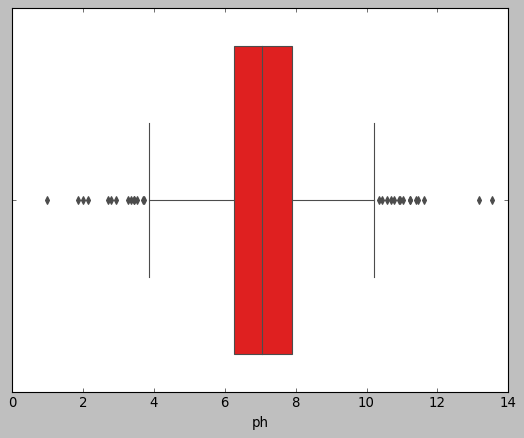

Hardness


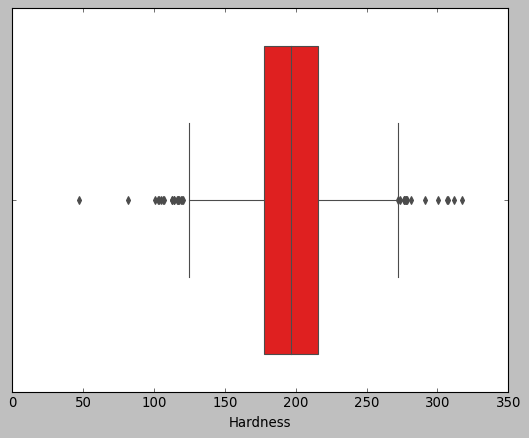

Solids


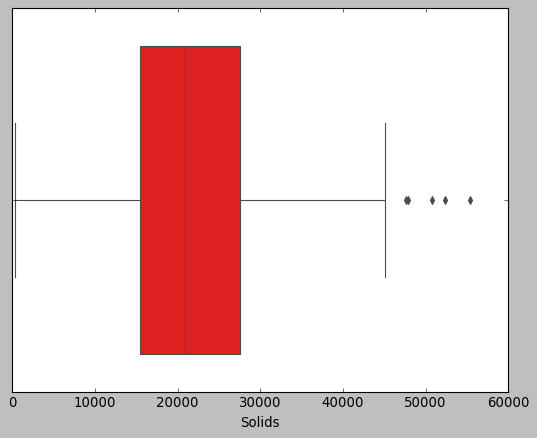

Chloramines


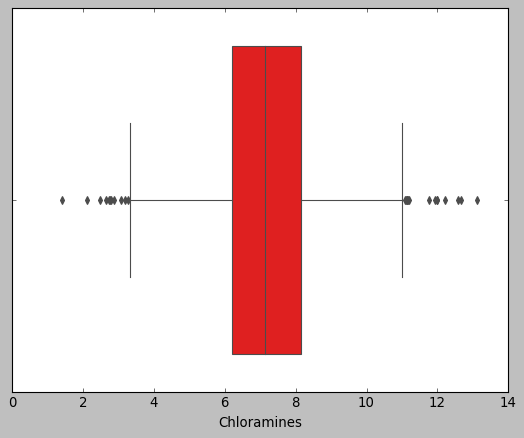

Sulfate


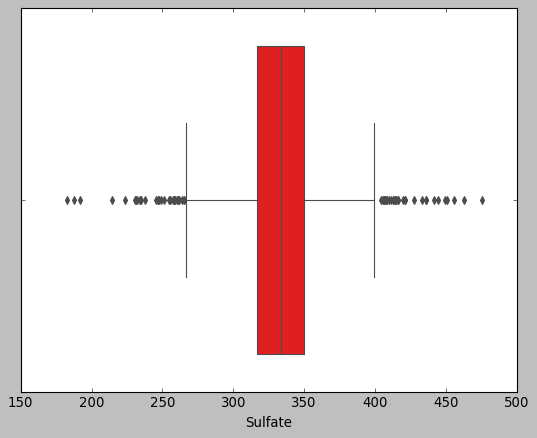

Conductivity


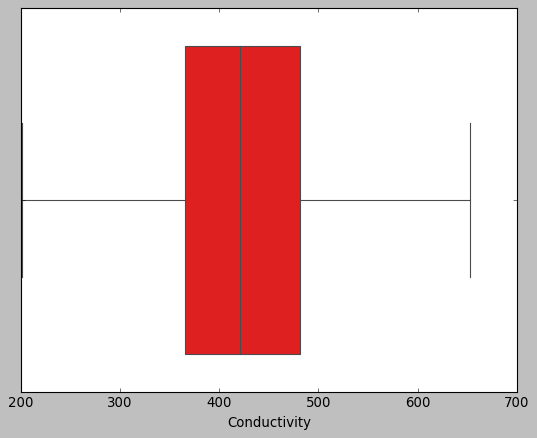

Organic_carbon


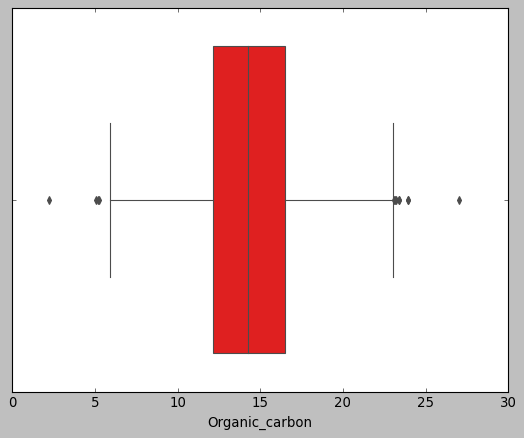

Trihalomethanes


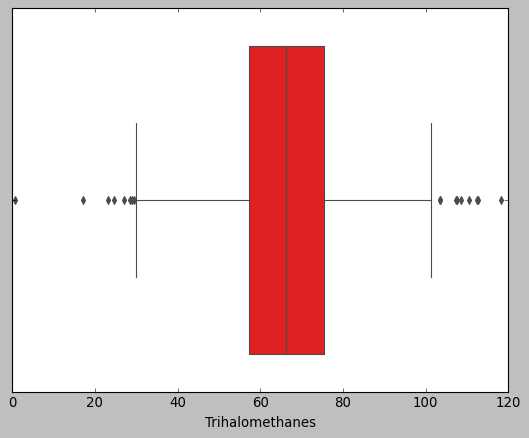

Turbidity


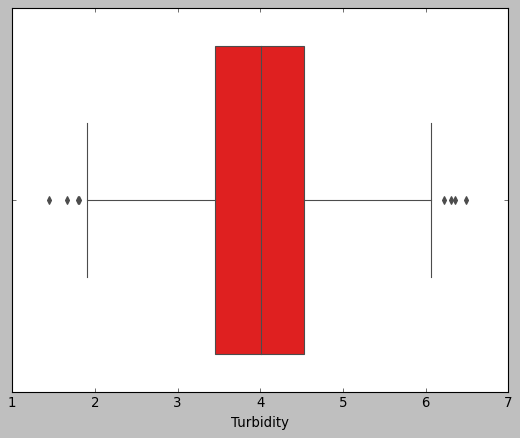

In [78]:
for col in test_df.iloc[:,0:9].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [79]:
def Outlier(var):
    for x in var.iloc[:, 0:9].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test = Outlier(test_df)

ph


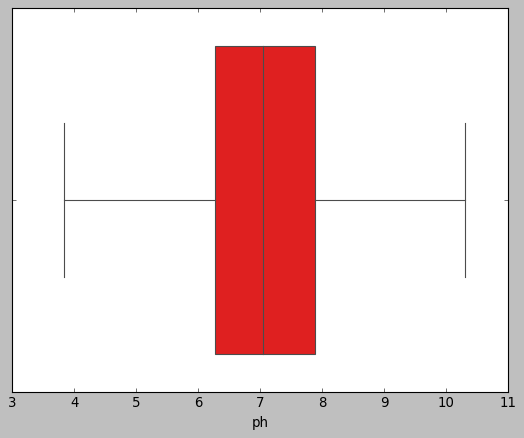

Hardness


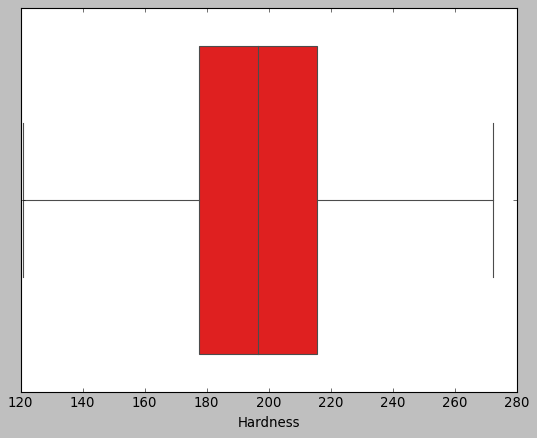

Solids


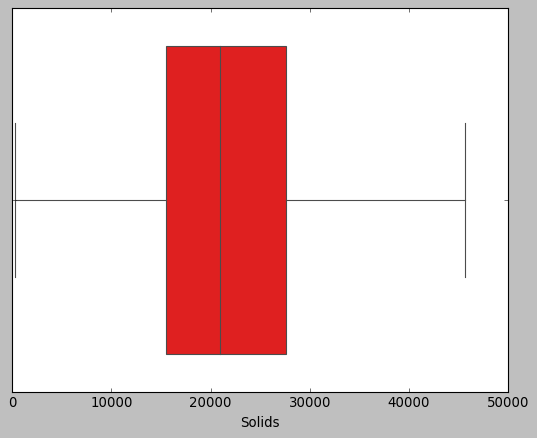

Chloramines


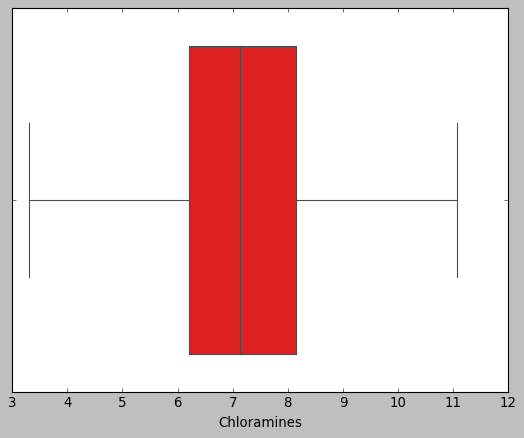

Sulfate


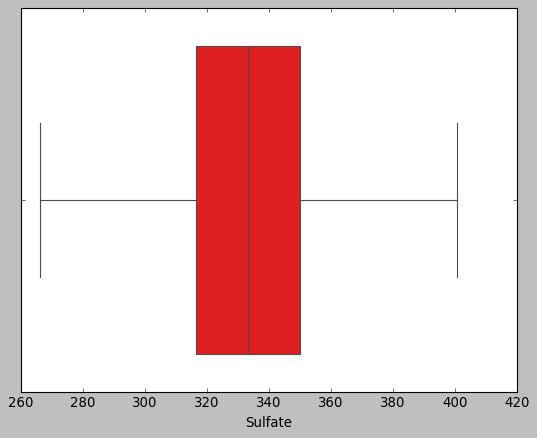

Conductivity


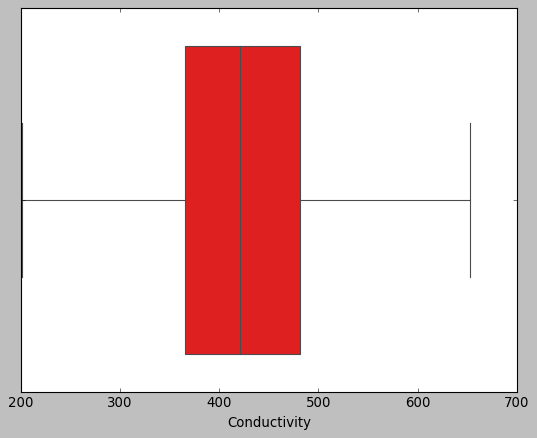

Organic_carbon


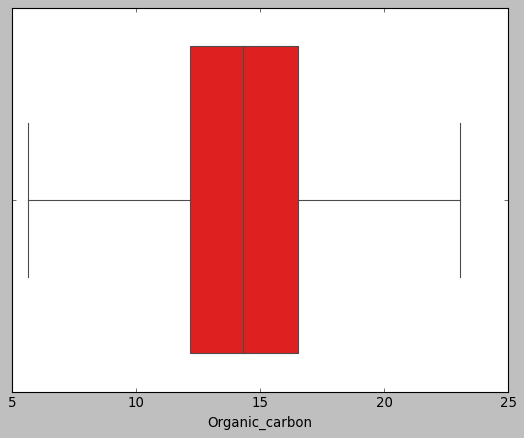

Trihalomethanes


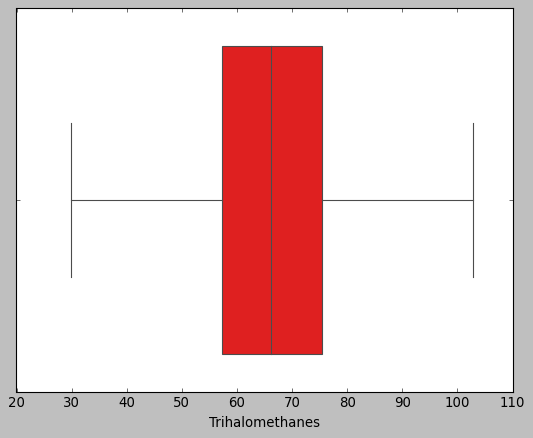

Turbidity


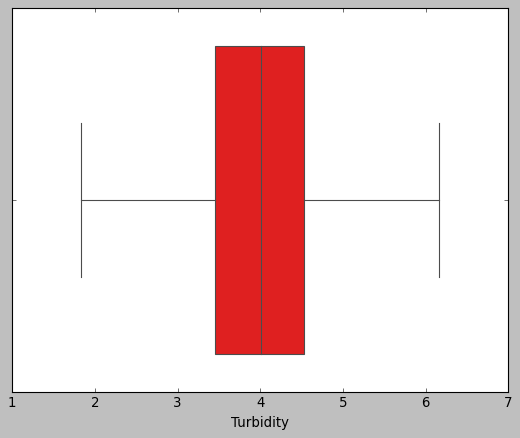

In [80]:
for col in test_df.iloc[:, 0:9].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [81]:
df_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,ID
0,7.050005,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,2947
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,2782
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,1644
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,70
4,6.615350,179.240661,26392.863612,9.309160,333.413519,496.363562,12.786595,78.262369,4.453443,2045
...,...,...,...,...,...,...,...,...,...,...
814,5.946161,190.551572,12767.656229,8.939748,323.742827,499.937502,12.415430,54.095581,4.903632,2580
815,7.050005,217.944979,37820.047327,8.299339,333.413519,367.570082,15.421034,36.446614,2.994780,2627
816,5.573201,229.174987,15613.160533,4.157902,383.481116,409.066577,10.751904,63.758516,3.599625,2246
817,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,7


In [82]:
test_water = df_test.iloc[:, 0:9]

In [83]:
test_water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.050005,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891
4,6.615350,179.240661,26392.863612,9.309160,333.413519,496.363562,12.786595,78.262369,4.453443
...,...,...,...,...,...,...,...,...,...
814,5.946161,190.551572,12767.656229,8.939748,323.742827,499.937502,12.415430,54.095581,4.903632
815,7.050005,217.944979,37820.047327,8.299339,333.413519,367.570082,15.421034,36.446614,2.994780
816,5.573201,229.174987,15613.160533,4.157902,383.481116,409.066577,10.751904,63.758516,3.599625
817,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [84]:
predicted_test = knn.predict(test_water)

In [85]:
predicted_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [86]:
test_water['Potability'] = predicted_test

In [87]:
test_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.050005,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,0
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,0
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,0
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,0
4,6.615350,179.240661,26392.863612,9.309160,333.413519,496.363562,12.786595,78.262369,4.453443,0


In [88]:
test_water.to_csv('submission_water.csv', index = False, header = False)